<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Estatísticas-Descritivas" data-toc-modified-id="Estatísticas-Descritivas-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Estatísticas Descritivas</a></span><ul class="toc-item"><li><span><a href="#Geyser-dataset" data-toc-modified-id="Geyser-dataset-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Geyser dataset</a></span></li></ul></li><li><span><a href="#Localização" data-toc-modified-id="Localização-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Localização</a></span></li><li><span><a href="#Dispersão" data-toc-modified-id="Dispersão-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Dispersão</a></span><ul class="toc-item"><li><span><a href="#Desvio-padrão" data-toc-modified-id="Desvio-padrão-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Desvio padrão</a></span></li><li><span><a href="#IQR-(Amplitude-interquartil)" data-toc-modified-id="IQR-(Amplitude-interquartil)-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>IQR (Amplitude interquartil)</a></span></li></ul></li><li><span><a href="#Vizualizando-localização/dispersão" data-toc-modified-id="Vizualizando-localização/dispersão-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Vizualizando localização/dispersão</a></span><ul class="toc-item"><li><span><a href="#Simulando-dados" data-toc-modified-id="Simulando-dados-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Simulando dados</a></span></li><li><span><a href="#Diferença-de-localização" data-toc-modified-id="Diferença-de-localização-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Diferença de localização</a></span></li><li><span><a href="#Diferença-de-dispersão" data-toc-modified-id="Diferença-de-dispersão-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Diferença de dispersão</a></span></li><li><span><a href="#Vizualizando-Indicadores-Robustos" data-toc-modified-id="Vizualizando-Indicadores-Robustos-4.4"><span class="toc-item-num">4.4&nbsp;&nbsp;</span>Vizualizando Indicadores Robustos</a></span></li></ul></li></ul></div>

# Estatísticas Descritivas

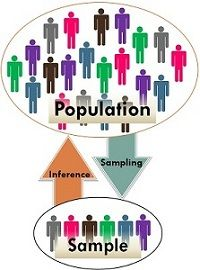

## Geyser dataset

In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
from matplotlib import pyplot as plt

In [ ]:
tb_geyser = sns.load_dataset('geyser')

In [ ]:
tb_geyser.head()

In [ ]:
tb_geyser.describe()

# Localização

In [ ]:
def meu_mu(vetor):
    total = sum(vetor)
    numero_elementos = len(vetor)
    media = total/numero_elementos
    return media

In [ ]:
meu_mu(tb_geyser['duration'])

In [ ]:
np.mean(tb_geyser['duration'])

In [ ]:
tb_geyser['duration'].mean()

In [ ]:
def minha_mediana(vetor):
    vetor_ordenado = sorted(list(vetor))
    posicao_meio = int(len(vetor_ordenado)/2)
    mediana = vetor_ordenado[posicao_meio]
    return mediana

In [ ]:
minha_mediana(tb_geyser['duration'])

In [ ]:
tb_geyser['duration'].median()

In [ ]:
np.median(tb_geyser['duration'])

In [ ]:
tb_geyser.groupby('kind').mean()

In [ ]:
tb_geyser.groupby('kind').median()

In [ ]:
tb_geyser.groupby('kind').agg(
    duration_avg = pd.NamedAgg('duration', 'mean'),
    duration_med = pd.NamedAgg('duration', 'median'),
    waiting_avg = pd.NamedAgg('waiting', 'mean'),
    waiting_med = pd.NamedAgg('waiting', 'median'),
)

# Dispersão

## Desvio padrão

In [ ]:
tb_geyser['duration_desvio'] = tb_geyser['duration'] - np.mean(tb_geyser['duration'])

In [ ]:
tb_geyser['duration_desvio'].mean()

In [ ]:
tb_geyser['duration_desvio_quadrado'] = tb_geyser['duration_desvio'] ** 2

In [ ]:
tb_geyser['duration_desvio_quadrado'].mean()

In [ ]:
np.sqrt(tb_geyser['duration_desvio_quadrado'].mean())

In [ ]:
np.std(tb_geyser['duration'])

## IQR (Amplitude interquartil)

In [ ]:
dur_mediana = np.median(tb_geyser['duration'])

In [ ]:
dur_p25 = np.quantile(tb_geyser['duration'], 0.25)
print(dur_p25)

In [ ]:
dur_p75 = np.quantile(tb_geyser['duration'], 0.75)
print(dur_p75)

In [ ]:
print(dur_p75 - dur_p25)

In [ ]:
def iqr(vetor):
    dur_p25 = np.quantile(vetor, 0.25)
    dur_p75 = np.quantile(vetor, 0.75)
    
    return dur_p75 - dur_p25

# Vizualizando localização/dispersão

## Simulando dados

In [ ]:
mu_0_sd_1 = np.random.normal(0, 1, 1000)
mu_0_sd_2 = np.random.normal(0, 2, 1000)
mu_2_sd_1 = np.random.normal(2, 1, 1000)

## Diferença de localização

In [ ]:
plt.figure(figsize=(8,6));
plt.hist(mu_2_sd_1, bins=100, alpha=0.5, label="mu_2_sd_1");
plt.hist(mu_0_sd_1, bins=100, alpha=0.5, label="mu_0_sd_1");
plt.axvline(np.mean(mu_0_sd_1), color = 'blue');
plt.axvline(np.mean(mu_2_sd_1), color = 'red');
plt.xlabel("Dados Simulados", size=14)
plt.ylabel("Contagem", size=14);
plt.title("Distribuições Normais mu = 0 e mu = 2, sigma = 1");
plt.legend(loc='upper right');

## Diferença de dispersão

In [ ]:
plt.figure(figsize=(8,6));
plt.hist(mu_0_sd_2, bins=100, alpha=0.5, label="mu_2_sd_1");
plt.hist(mu_0_sd_1, bins=100, alpha=0.5, label="mu_0_sd_1");
plt.axvline(np.mean(mu_0_sd_1), color = 'blue');
plt.axvline(np.mean(mu_0_sd_2), color = 'red');
plt.xlabel("Dados Simulados", size=14)
plt.ylabel("Contagem", size=14);
plt.title("Distribuições Normais mu = 0, sigma = 1, sigma = 2");
plt.legend(loc='upper right');

## Vizualizando Indicadores Robustos

In [ ]:
plt.figure(figsize=(8,6));
plt.boxplot([mu_0_sd_1, mu_2_sd_1, mu_0_sd_2],
           labels = ['mu_0_sd_1', 'mu_2_sd_1', 'mu_0_sd_2']);
plt.ylabel('Dado Simulado');
plt.xlabel('Distribuição');
plt.suptitle('Boxplots de Distribuições');

In [ ]:
fig, axes = plt.subplots(1, 2, figsize = (18,9))
sns.boxplot(data = tb_geyser, y = 'duration', x = 'kind', ax = axes[0])
sns.boxplot(data = tb_geyser, y = 'duration', ax = axes[1])
plt.xlabel('Total')
plt.suptitle('Duração de Erupção Total e por Tipo de Geyser')